In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime as dt
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv("../data/epa-sea-level_csv.csv", parse_dates= ['Year'])
df["Year"] = pd.DatetimeIndex(df["Year"]).year
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [3]:
df.dtypes

Year                          int64
CSIRO Adjusted Sea Level    float64
Lower Error Bound           float64
Upper Error Bound           float64
NOAA Adjusted Sea Level     float64
dtype: object

Text(0, 0.5, 'CSIRO Adjusted Sea Level')

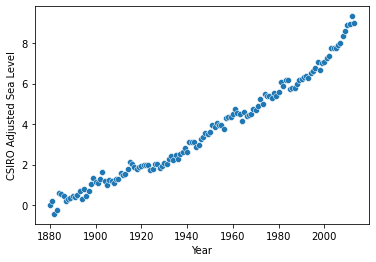

In [4]:
sns.scatterplot(data=df, x="Year", y= "CSIRO Adjusted Sea Level")
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level")

In [5]:
df["Year"].astype(int)

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
130    2010
131    2011
132    2012
133    2013
134    2014
Name: Year, Length: 135, dtype: int64

In [6]:
df.dtypes

Year                          int64
CSIRO Adjusted Sea Level    float64
Lower Error Bound           float64
Upper Error Bound           float64
NOAA Adjusted Sea Level     float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      135 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   22 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [8]:
df.drop(134, axis=0, inplace=True)

In [9]:
regression = linregress(np.asarray(df["Year"]), np.asarray(df['CSIRO Adjusted Sea Level']))

In [10]:
regression

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)

In [11]:
x_range = pd.date_range(start = "1880", end="2050", freq='Y')

In [12]:
x_range_year = pd.DatetimeIndex(x_range).year
x_range_year

Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049],
           dtype='int64', length=170)

Text(0, 0.5, 'CSIRO Adjusted Sea Level')

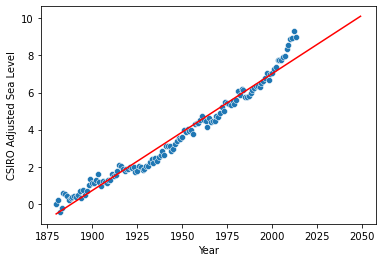

In [13]:
sns.scatterplot(data=df, x="Year", y= "CSIRO Adjusted Sea Level")
plt.plot(np.asarray(x_range_year), np.asarray(x_range_year)*regression.slope+regression.intercept, 'r')
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level")


In [14]:
df2 = df.iloc[120:]
df2.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933


In [15]:
x_range2 = pd.date_range(start = "2000", end="2050", freq='Y')
x_range_year2 = pd.DatetimeIndex(x_range2).year


In [16]:
regression2 = linregress(np.asarray(df2["Year"]), np.asarray(df2['CSIRO Adjusted Sea Level']))
regression2

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)

Text(0, 0.5, 'CSIRO Adjusted Sea Level')

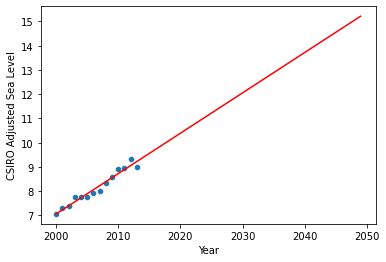

In [17]:
sns.scatterplot(data=df2, x="Year", y= "CSIRO Adjusted Sea Level")
plt.plot(np.asarray(x_range_year2), np.asarray(x_range_year2)*regression2.slope+regression2.intercept, 'r')
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level")
